In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
import random
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import adjusted_rand_score as ars
from sklearn.cluster import KMeans
from itertools import combinations as cb
from sklearn.manifold import SpectralEmbedding as se

In [33]:
random.seed(42)
# rand_num = random.sample(range(0, 101), 25)
rand_num = random.sample(range(100, 201), 25)
rand_num = sorted(rand_num)

In [34]:
rand_factor = []
rand_noise = []
for i in range(200):
    rand_factor.append(random.random())
    rand_noise.append(random.random()*0.1)

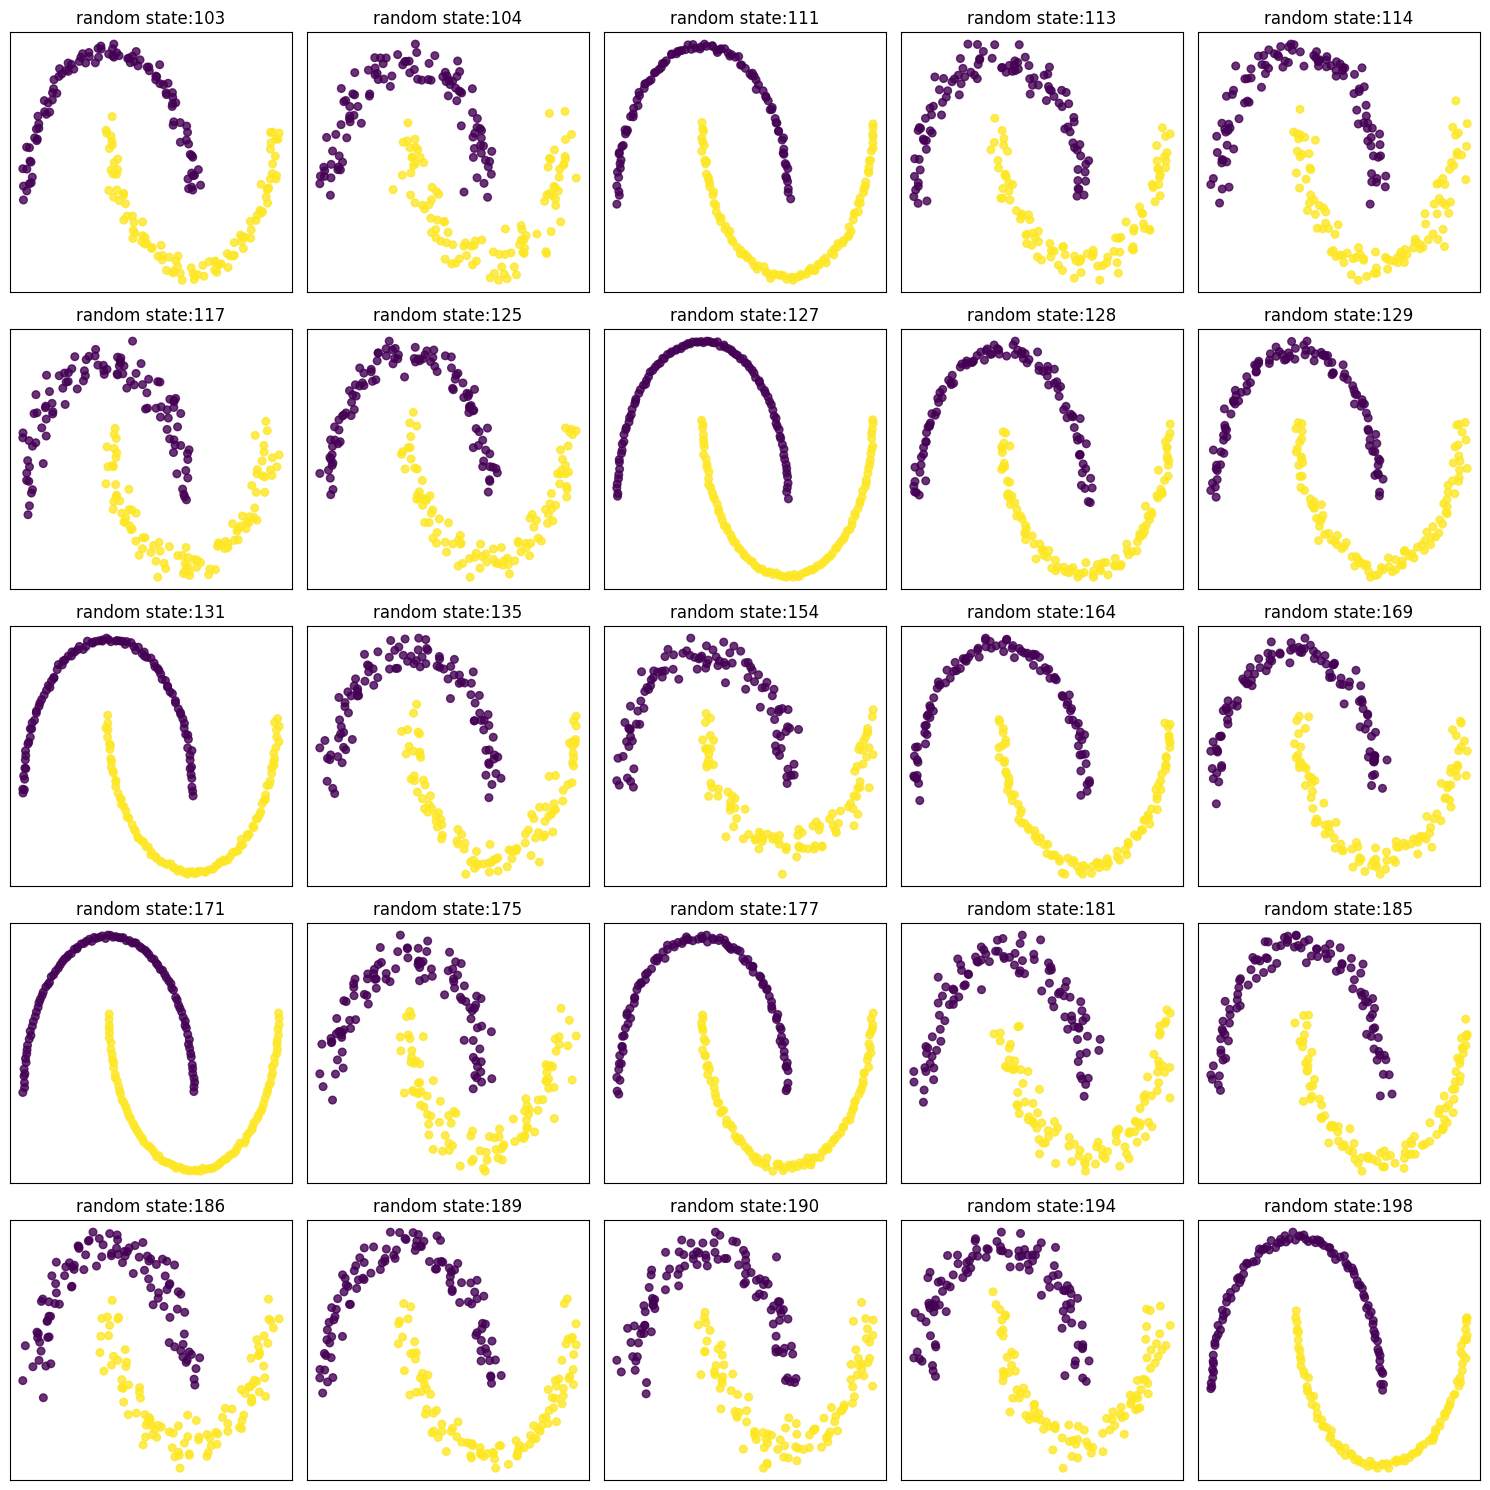

In [35]:
def get_blobs(n_samples=200, centers=4, random_state=42):
    # X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    n = random.randint(0, n_samples)
    # X, Y = datasets.make_circles(n_samples=n_samples, factor=rand_factor[n], noise=rand_noise[n], random_state=random_state)
    X, Y = datasets.make_moons(n_samples=n_samples, noise=rand_noise[n], random_state=random_state)
    return X, Y

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten() 
for i in range(25):
    seed = rand_num[i]
    X, Y = get_blobs(random_state=seed)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    ax.set_title(f'random state:{seed}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [36]:
fig.savefig('rd_plots/original_sklearn_moon_100.png')

In [37]:
def core_routine(X, num_clusters=4):
    # matrices
    A = np.exp(-pairwise_distances(X, metric='euclidean'))
    emb = se(n_components=num_clusters, affinity='precomputed', random_state=42)
    return emb.fit_transform(A)

def get_score(X, Y, method): # ss or ard
    km = KMeans(n_clusters=2, random_state=42).fit(X)
    label_predicted = km.fit_predict(X)
    if method=='ss':
        return ss(X, label_predicted)
    elif method=='ars':
        return ars(Y, label_predicted)

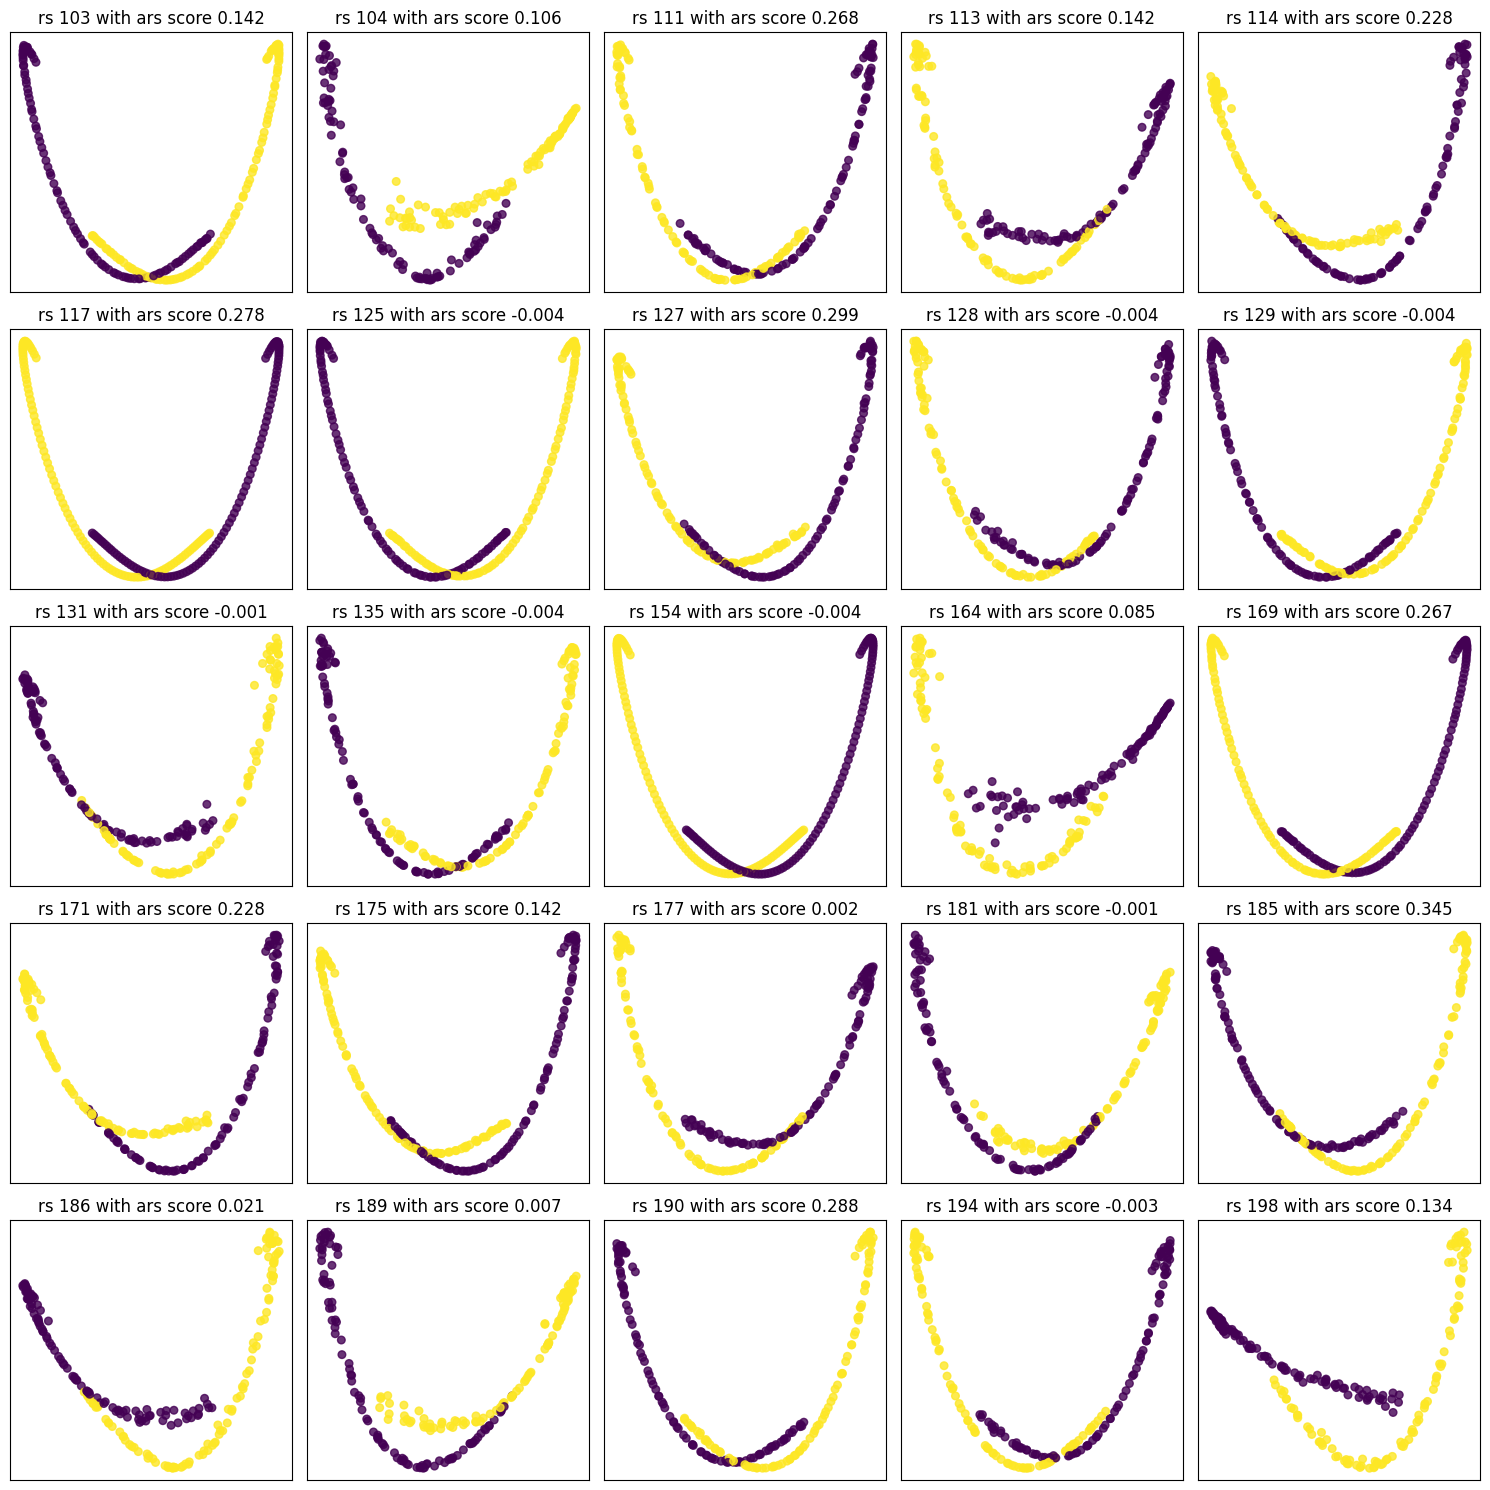

In [38]:
score_list = []

fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid, adjust size as needed
axes = axes.flatten() 

for i, rn in enumerate(rand_num):
    # generate dataset
    X, Y = get_blobs(random_state=rn)
    # core routine to embed data on LE
    X = core_routine(X)
    # get the best indices and corresponding score
    method = 'ars' # or ss
    score = np.round(get_score(X, Y, method),3)
    score_list.append(score)
    # plot
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    ax.set_title(f'rs {rn} with {method} score {score}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [39]:
fig.savefig('rd_plots/original_sklearn_moon_100.png')

In [40]:
score_df = pd.DataFrame([rand_num, score_list]).T
score_df.columns = ['random_state','score']
score_df['random_state'] = score_df['random_state'].astype('int')
score_df

,random_state,score
0,103,0.142
1,104,0.106
2,111,0.268
3,113,0.142
4,114,0.228
5,117,0.278
6,125,-0.004
7,127,0.299
8,128,-0.004
9,129,-0.004


In [41]:
score_df.to_csv('rd_plots/sklearn_moon_table_100.csv', index=False)